In [1]:
# Imports
from src.color_space.all import *
from matplotlib import pyplot as plt

# Constants
PRINT_ARRAY: bool = True
size: int = 2

In [2]:
# Ask user for image size to generate
#size: int = int(input("Enter the size of the image to generate: "))

[[[172  47]
  [117 192]]

 [[ 67 251]
  [195 103]]

 [[  9 211]
  [ 21 242]]]
[[[172  67   9]
  [ 47 251 211]]

 [[117 195  21]
  [192 103 242]]]


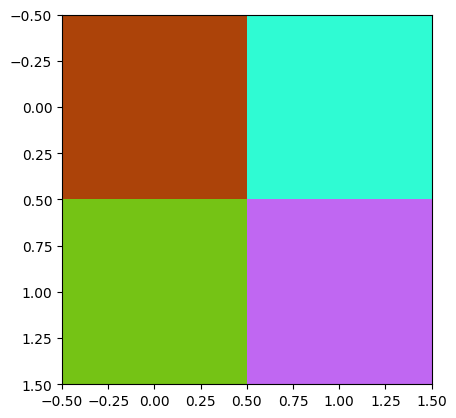

In [3]:
# Generate a random image and plot it
#sliced: np.ndarray = random_image(size, seed = 0, maxi = 5)
sliced: np.ndarray = random_image(size, seed = 0)
r_image: np.ndarray = sliced_rgb_to_img(sliced)
if PRINT_ARRAY:
	print(sliced)
	print(r_image)
plt.imshow(r_image)

[[ 82.66666667 169.66666667]
 [111.         179.        ]]
[[ 85.1307 204.766 ]
 [165.8796 131.9344]]
[[ 91.783 185.444]
 [151.842 145.457]]


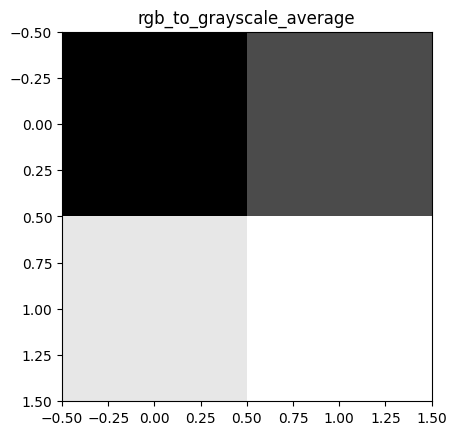

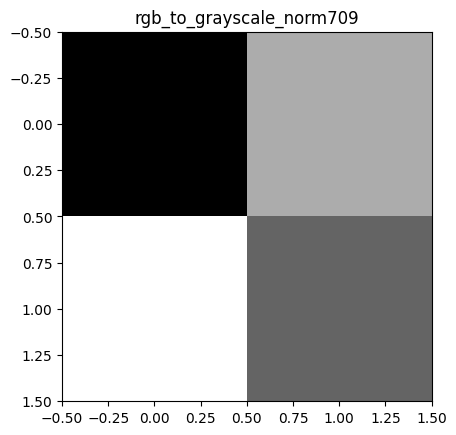

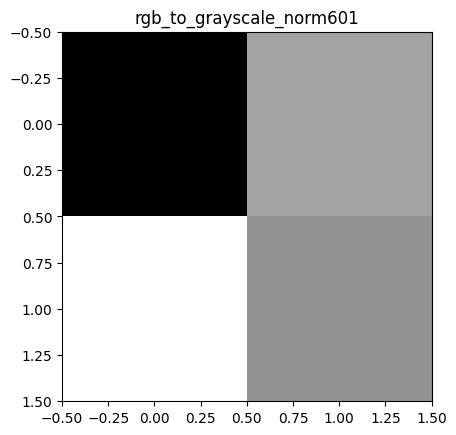

In [4]:
# Niveaux de gris
converters = [rgb_to_grayscale_average, rgb_to_grayscale_norm709, rgb_to_grayscale_norm601]
for f in converters:
	img = f(sliced)
	if PRINT_ARRAY:
		print(img)
	plt.figure()
	plt.imshow(sliced_rgb_to_img(img), cmap = 'gray')
	plt.title(f.__name__)

[[[  91.783  185.444]
  [ 151.842  145.457]]

 [[  81.256 -108.704]
  [   9.54     8.286]]

 [[   4.059  -55.524]
  [ -70.746   62.147]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[  91.783  185.444]
  [ 151.842  145.457]]

 [[ -40.714   12.759]
  [ -64.377   47.763]]

 [[  70.375 -121.46 ]
  [ -30.57    40.835]]]
[[[ 82.66666667 169.66666667]
  [111.         179.        ]]

 [[ 81.5        -82.        ]
  [ 48.         -25.        ]]

 [[-11.75        61.        ]
  [ 63.         -57.        ]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[0.69354839 0.09233792]
  [0.35135135 0.3575419 ]]

 [[0.27016129 0.49312377]
  [0.58558559 0.19180633]]

 [[0.03629032 0.41453831]
  [0.06306306 0.45065177]]]


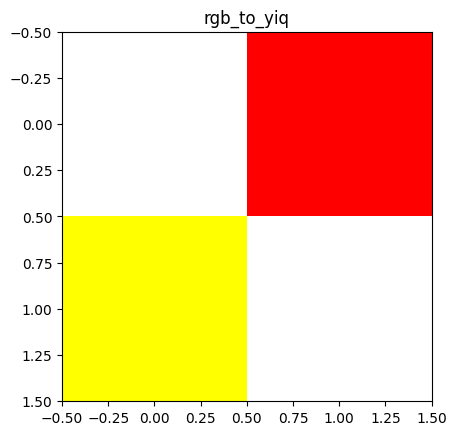

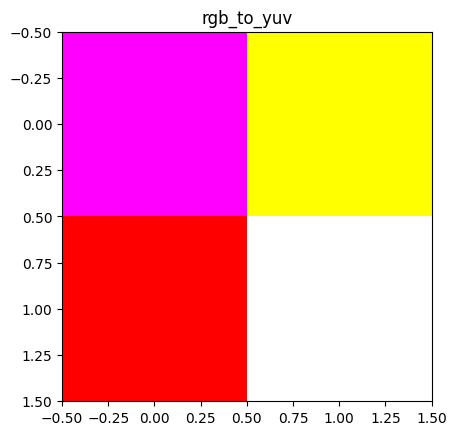

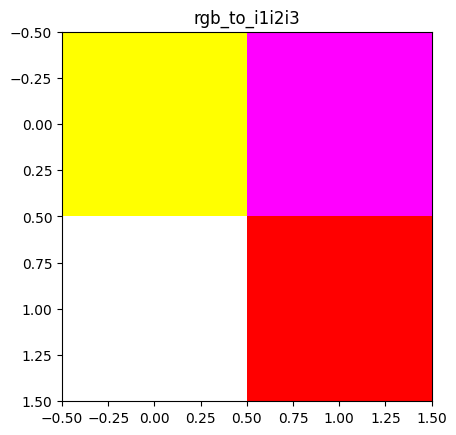

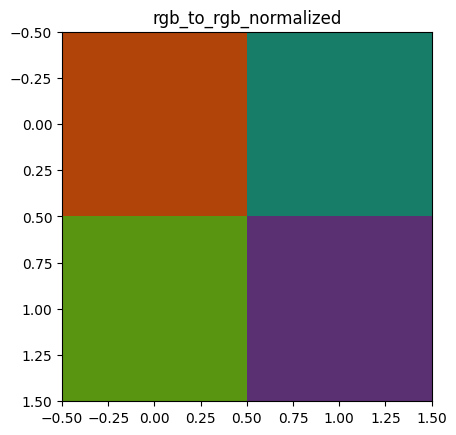

In [5]:
## Linears
converters = [rgb_to_yiq, rgb_to_yuv, rgb_to_i1i2i3, rgb_to_rgb_normalized]
for f in converters:
	img = f(sliced)
	if PRINT_ARRAY:
		print(img)
	plt.figure()
	plt.imshow(sliced_rgb_to_img(img))
	plt.title(f.__name__)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 21.34969325 168.23529412]
  [ 86.89655172 278.41726619]]

 [[  0.90055249   0.96226415]
  [  0.80555556   0.84242424]]

 [[  0.35490196   0.58431373]
  [  0.42352941   0.67647059]]]
[[[ 21.34969325 168.23529412]
  [ 86.89655172 278.41726619]]

 [[  0.94767442   0.812749  ]
  [  0.89230769   0.57438017]]

 [[  0.6745098    0.98431373]
  [  0.76470588   0.94901961]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[0.         0.812749  ]
  [0.4        0.20661157]]

 [[0.61046512 0.        ]
  [0.         0.57438017]]

 [[0.94767442 0.15936255]
  [0.89230769 0.        ]]

 [[0.3254902  0.01568627]
  [0.23529412 0.05098039]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 64.47259187  91.81519185]
  [ 84.50482883  77.12986205]]

 [[ 20.99122493 -41.26765624]
  [-35.71898251  33.66295289]]

 [[ 55.72382688  -2.3204149 ]
  [ 63.86806201 -31.52392329]]]


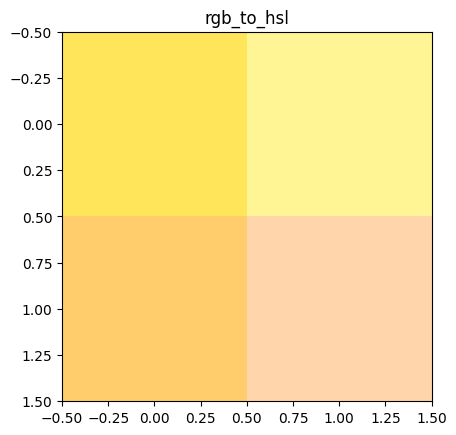

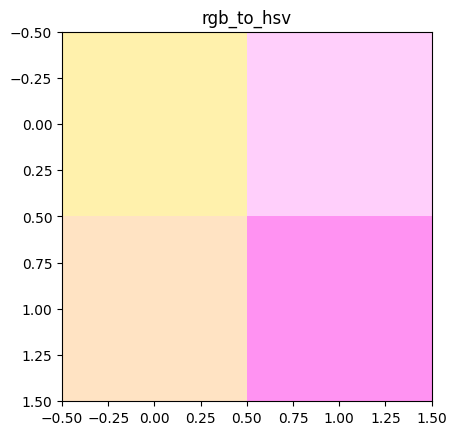

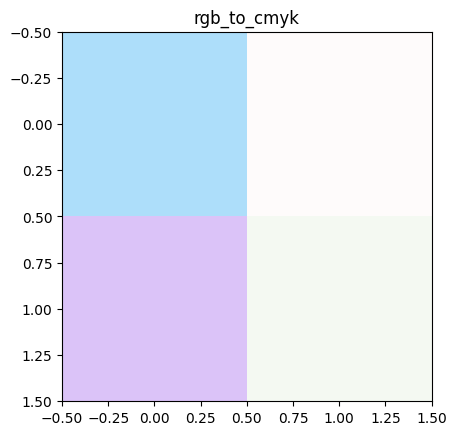

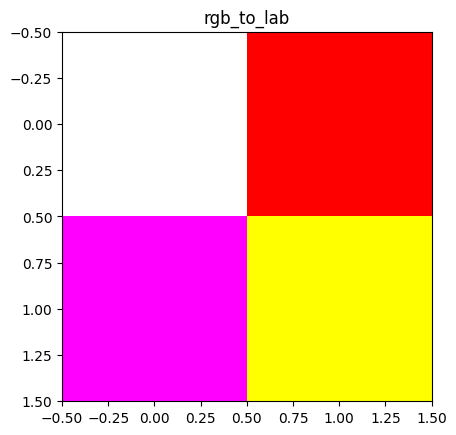

In [6]:
## Non linears
converters = [rgb_to_hsl, rgb_to_hsv, rgb_to_cmyk, rgb_to_lab]#, rgb_to_luv]
for f in converters:
	img = f(sliced)
	if PRINT_ARRAY:
		print(img)
	plt.figure()
	plt.imshow(sliced_rgb_to_img(img))
	plt.title(f.__name__)